In [1]:
import numpy as np
import matplotlib.pyplot as plt
import resfuncRead as rfr

from Yield_extract import Yield_NR, Yield_ER
from NR_ER_Plot import NR_ER_Band

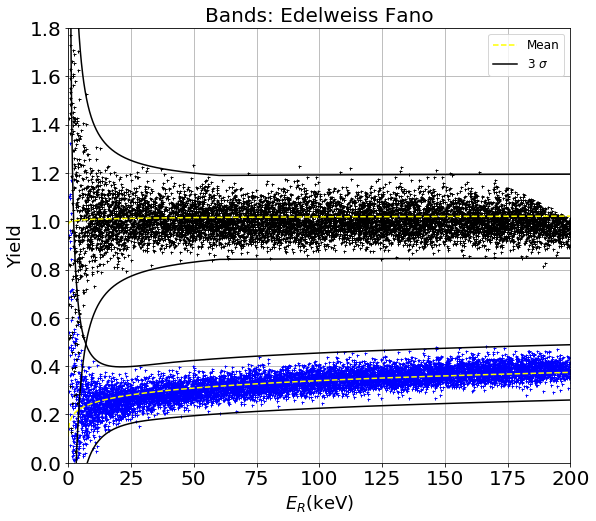

In [2]:
N = 10000
Er = np.random.uniform(0,200,N)
#Er = np.random.exponential(40,np.uint32(N*0.3))

ENR,N_e_h,sigQ,sigP,PT1,QNR,ER,Yield,U1,U2,fano = Yield_NR(N,Er)

Yield_er, ERer = Yield_ER(N)


NR_ER_Band(ER,Yield,ERer,Yield_er)

In [3]:

data = np.vstack((ER,Yield,sigQ,sigP,U1,U2,N_e_h)).T
print(data.shape)

x = data[data[:,1]>=0, :]

data1 = x[x[:,1]<=1.6,:]
data2 = data1[data1[:,0]>=0,:]


#data = np.vstack((Er,Y)).T
#print(data)
#np.savetxt("test_data.txt",data)

#data1 = data2[np.argsort(data2[:, 0])]



(10000, 7)


In [4]:
#a,b,c,d,e,f,g = np.array_split(data1,7)
data = np.array_split(data2,50)



In [5]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [6]:
#Finds the width in a yield dist for a particular energy bin to be used later in yield variance calculation (fano)
def find_sigma(data):
    mu,sigma = norm.fit(data[:,1])
    
   # gaus(data[:,1],2,0.03,0.05)
    
    n,bins = np.histogram(data[:,1],60)
    
    a = max(data[:,1])
    b = np.average(data[:,1])
    c = sigma
    
    popt,pcov = curve_fit(gaus,bins[:-1],n,p0=[a,b,c])
    
    #y = mlab.normpdf(bins, mu, sigma)
 
    #plt.figure()
    #plt.hist(data[:,1],bins =60)
    #plt.plot(bins,gaus(bins,*popt), 'r--', linewidth = 2)
    #plt.xlabel("Yield")
    #plt.show()
    
    return  pcov, popt

In [7]:
#finds average fano in particular energy bin
def gaus1(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def find_fano(data):
    
    mu,sigma = norm.fit(data)
    
    #gaus1(data,2,0.03,0.05)
    
    n,bins = np.histogram(data,60)
    
        
    a = max(data)
    b = np.mean(data)
    c = np.std(data)
    
    
    popt1,pcov1 = curve_fit(gaus1,bins[:-1],n,p0=[a,b,c])
    
    #y = mlab.normpdf(bins, mu, sigma)
 
    #plt.figure()
    #plt.hist(data,bins =60)
    #plt.plot(bins,gaus(bins,*popt1), 'r--', linewidth = 2)
   # plt.xlabel("Extracted Fano")
    #plt.show()
    
    return  popt1, pcov1, mu

In [8]:
'''
sig = []
for this_data in data:
    x,y = find_sigma(this_data)
    #print(x,y)
    sig.append(y[2])
    
#print(sig)
'''

'\nsig = []\nfor this_data in data:\n    x,y = find_sigma(this_data)\n    #print(x,y)\n    sig.append(y[2])\n    \n#print(sig)\n'

In [9]:
#Fano = (b[:,4]**2*b[:,2] +b[:,5]**2*b[:,3] -sigma)**2/(b[:,6]*(b[:,4]**2*eps + V/1000*b[:,5]**2))

def calc_fano(data):
    mean = []
    error = []
    for x in data:

        #x = data[i]
        U1 = x[:,4]
        U2 = x[:,5]
        sigQ = x[:,2]
        sigP = x[:,3]
        sigy =np.std(x[:,1])
        N = x[:,6]
        
        Fano = (-U1**2*sigQ**2-U2**2*sigP**2 + sigy**2)/(U1**2*eps**2 +U2**2*(V/1000)**2)
        #Fano = (sigy**2*Enr**2 - sigQ**2)/(eps**2*N)
        Fano = Fano/N
        #print(min(x[:,0]),max(x[:,0]))
        
       # x,y,z = find_fano(Fano)
        
        #mean.append(x[1])
        #error.append(np.sqrt(y[2,2]))
        mean.append(np.mean(Fano))
        error.append(np.std(Fano))
      
        
        #print("mean :",x[1],",","uncertainty in mean : ",y[1,1])
        #print(x)

       
    return mean, error
        
    



In [10]:
means,errors = calc_fano(data)
print(np.average(errors))

x = np.arange(0,50)

plt.figure()
plt.errorbar(x,means,yerr=errors,fmt ='o',label = 'error', ecolor = 'purple', Linestyle = 'None', capsize=5, capthick=0.5)
plt.axhline(y=F, color='r', linestyle='-')
plt.ylim(0,150)
plt.show()

NameError: name 'eps' is not defined